# 1.- Load dependencies

In [1]:
import os
import sys

# add subpath to notebooks
sys.path.append(os.path.abspath(os.path.join('..')))
# sys.path.append(os.path.abspath(os.path.join('../utils')))
sys.path.append('../')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.paths import list_images
from dense10_segmentator import DenseSegmentator

import tensorflow as tf

from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import Session
from tensorflow.compat.v1 import ConfigProto

config = ConfigProto()
# dynamically grow GPU memory
config.gpu_options.allow_growth = True
set_session(Session(config=config))

%load_ext autoreload
%autoreload 2

2022-10-25 19:58:35.999941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 19:58:37.310649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 19:58:37.350145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 19:58:37.376750: I tensorflow/stream_executor/cud

# 2.- Set path of weights and config file

In [2]:
# openeds config
# inifile_path = '../config/openeds_dense10.ini'
# modelpath = '../models/epoch_124_miou_0.9345.h5'

# alcohol config
inifile_path = '../config/segmentator_dense10.ini'
modelpath = '/home/choppy/TOC/densenet10/models/weights/dense_models/blurry_gemini_dense_miou_0.9275.h5'

# 3.- Instance and load model

In [3]:
model = DenseSegmentator(modelpath=modelpath, inifile_path=inifile_path)

2022-10-25 19:58:37.974770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 19:58:37.975139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 19:58:37.975435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 19:58:37.975819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 19:58:37.976110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

# 4.- Load example images

In [4]:
# folder_ims = '/home/choppy/TOC/datasets/openeds/ttv/test/images'
# folder_ims = '/media/choppy/WD_BLACK/datasets/OpenEDS/openeds_split/test/images'

folder_ims = "/home/choppy/TOC/datasets/alcohol/alcohol_v7.0"
all_images = sorted([*list_images(folder_ims)])

# 5.- Select image to segmentate

In [5]:
image = model.load_image(path=np.random.choice(all_images)) # random image
# image = model.load_image(all_images[0]) # first image

# 6.- Use "forward" model function to get all image info
### Mask and original image shapes will be equal

In [13]:
info = model.forward(image)

rs_dim: 3
rs_dim: 1


/home/choppy/TOC/densenet10/dense10_segmentator.py:184: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(A, B)


# 7.- Show image and segmentation map given by the segmentator model

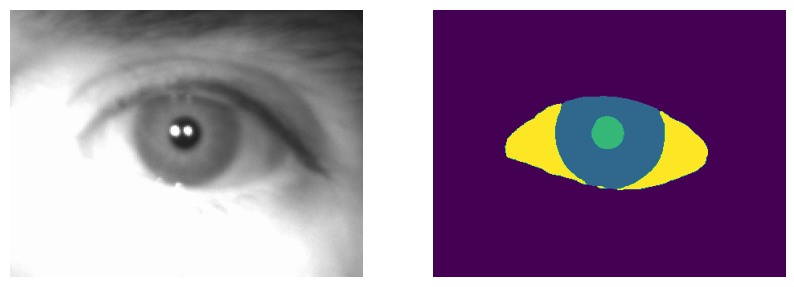

In [14]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.argmax(info['mask'], axis=-1))
plt.axis('off')

plt.show()

# 8.- Print data headers given by the model

In [15]:
list(info.keys())

['pupil_x',
 'pupil_y',
 'pupil_r_min',
 'pupil_r_max',
 'iris_x',
 'iris_y',
 'iris_r_min',
 'iris_r_max',
 'mask',
 'iris_rubbersheet',
 'mask_iris_rubbersheet',
 'pred_shape',
 'radii_type_estimator',
 'original_shape']

# 9.- Print value of each key

In [55]:
for k in info:
    if k not in ('mask', 'iris_rubbersheet', 'mask_iris_rubbersheet', 'bitwised_iris_rubbersheet'): # dont print images
        print(f'{k}: \t {info[k]}')

pupil_x: 	 244
pupil_y: 	 326
pupil_r_min: 	 47
pupil_r_max: 	 46
iris_x: 	 244
iris_y: 	 328
iris_r_min: 	 109
iris_r_max: 	 97
pred_shape: 	 [320, 320]
radii_type_estimator: 	 lms3
original_shape: 	 [480, 640]


# 10.- Draw circles over predicted regions

rs_dim: 3
rs_dim: 1


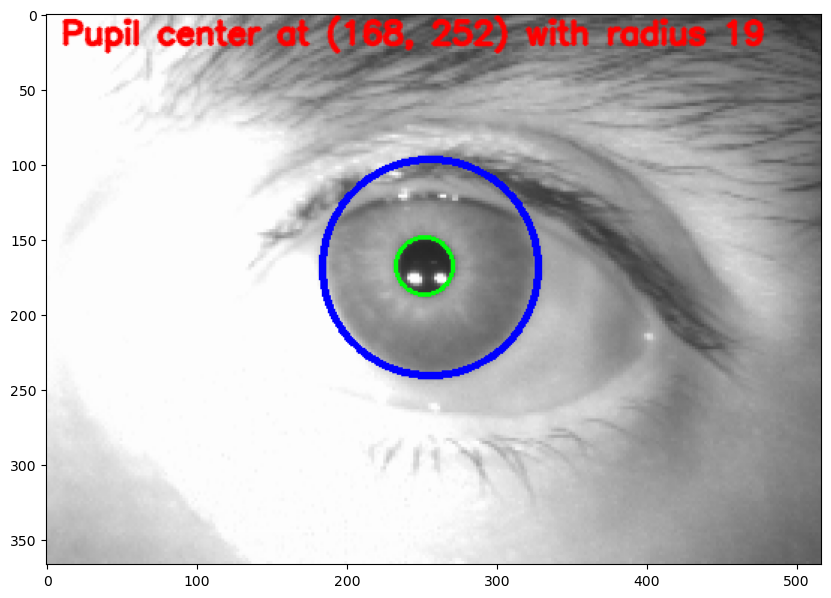

In [18]:
# do inference
str_image = np.random.choice(all_images)
im = model.load_image(str_image)
info = model.forward(im)

# iris
(x, y, r_min, r_max) = (info['iris_x'], info['iris_y'], info['iris_r_min'], info['iris_r_max'])
im = cv2.circle(im, (y, x), r_min, [0, 0, 255], 3)
text = f'Iris center at ({x}, {y}) with radius {r_min}'
cv2.putText(im, text, (10, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)


# pupil
(x, y, r_min, r_max) = (info['pupil_x'], info['pupil_y'], info['pupil_r_min'], info['pupil_r_max'])
im = cv2.circle(im, (y, x), r_min, [0, 255, 10], 2)
text = f'Pupil center at ({x}, {y}) with radius {r_min}'
cv2.putText(im, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)


plt.figure(figsize=(10, 8))
plt.imshow(im)

# Show iris rubbersheet and difference between mode extractions

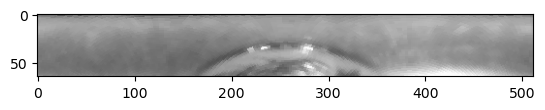

In [19]:
h_rs = info['iris_rubbersheet']
plt.imshow(h_rs)

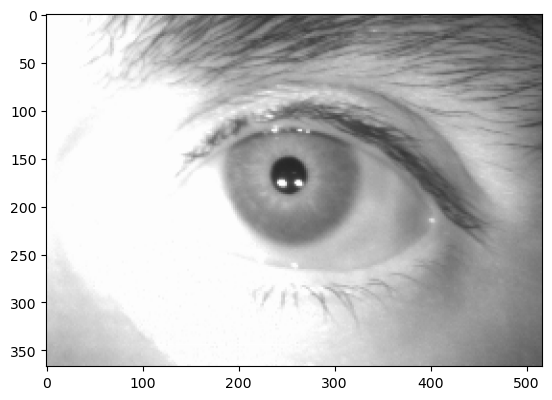

In [20]:
image = model.load_image(str_image)
plt.imshow(image)

rs_dim: 3
rs_dim: 1


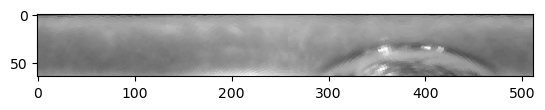

In [21]:
# change iris_mod_type
# height type is selected as default
old_mode = model.iris_mod_type

model.iris_mod_type = 'width'
info = model.forward(image)
w_rs = info['iris_rubbersheet']
plt.imshow(w_rs)

# return to old mode type
model.iris_mod_type = old_mode

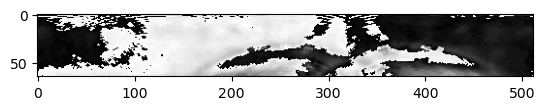

In [22]:
plt.imshow(h_rs - w_rs)

In [23]:
diff = h_rs - w_rs
_sum = diff.sum()

if _sum == 0:
    print('No difference over width and height iris extraction method')
else:
    print('There are differences between iris images. They could be moved in X-axis to match')

There are differences between iris images. They could be moved in X-axis to match


In [24]:
# begin iris binarization with ICA filters

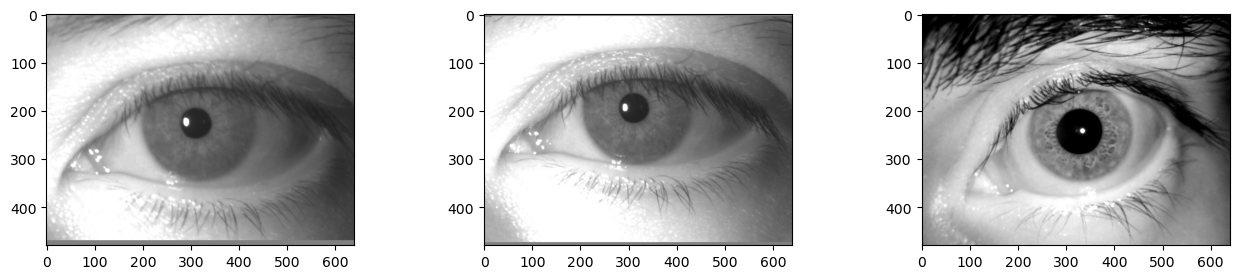

In [102]:
# show images examples
file1 = '.data/samples/0000784_LG_E_0_0_1_L_M_N_N_1981_9_2017.bmp'
file2 = '.data/samples/0000804_LG_E_0_0_2_L_M_N_N_1981_9_2017.bmp'
file3 = '.data/samples/0001367_Iritech_E_0_1_3_L_M_N_N_1982_56_2017.bmp'

samples = {
    'sample1': model.load_image(file1),
    'sample2': model.load_image(file2),
    'sample3': model.load_image(file3),
}

fig, axes = plt.subplots(1, 3, figsize=(16,3))

for ax, key_s in zip(axes, samples.keys()):
    ax.imshow(samples[key_s])

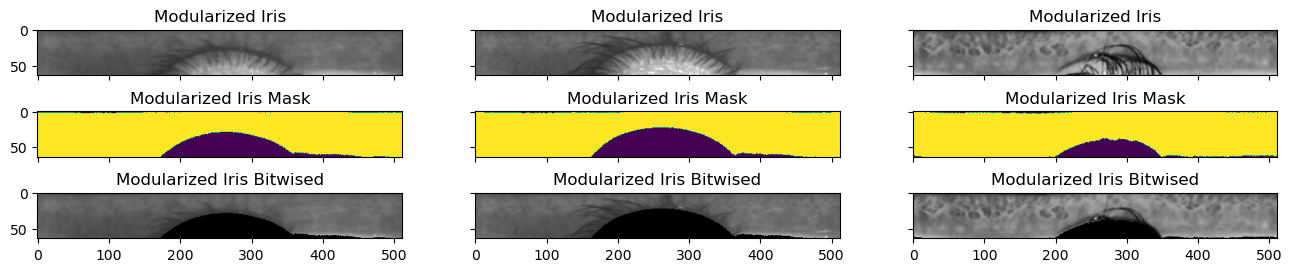

In [104]:
# get iris rubbersheet from each image example

samples_info = {}
fig, axes = plt.subplots(3, 3, figsize=(16,3), sharex=True, sharey=True)
axes = axes.T # rotate 3x3 grid example

for key_s, (ax1, ax2, ax3) in zip(samples, axes):
    image = samples[key_s].copy()
    info = model.forward(image)
    
    # get variable to another one more readable
    samples_info[key_s] = info
    
    iris_rs = info.get('iris_rubbersheet')
    mask_iris_rs = info.get('mask_iris_rubbersheet')
    bw_iris = info.get('bitwised_iris_rubbersheet')
    
    ax1.imshow(iris_rs)
    ax1.set_title('Modularized Iris')
    
    ax2.imshow(mask_iris_rs)
    ax2.set_title('Modularized Iris Mask')
    
    ax3.imshow(bw_iris)
    ax3.set_title('Modularized Iris Bitwised')